In [1]:
# 
using UnfoldSim
using Unfold
using CairoMakie
using UnfoldMakie
using DataFrames
using Random

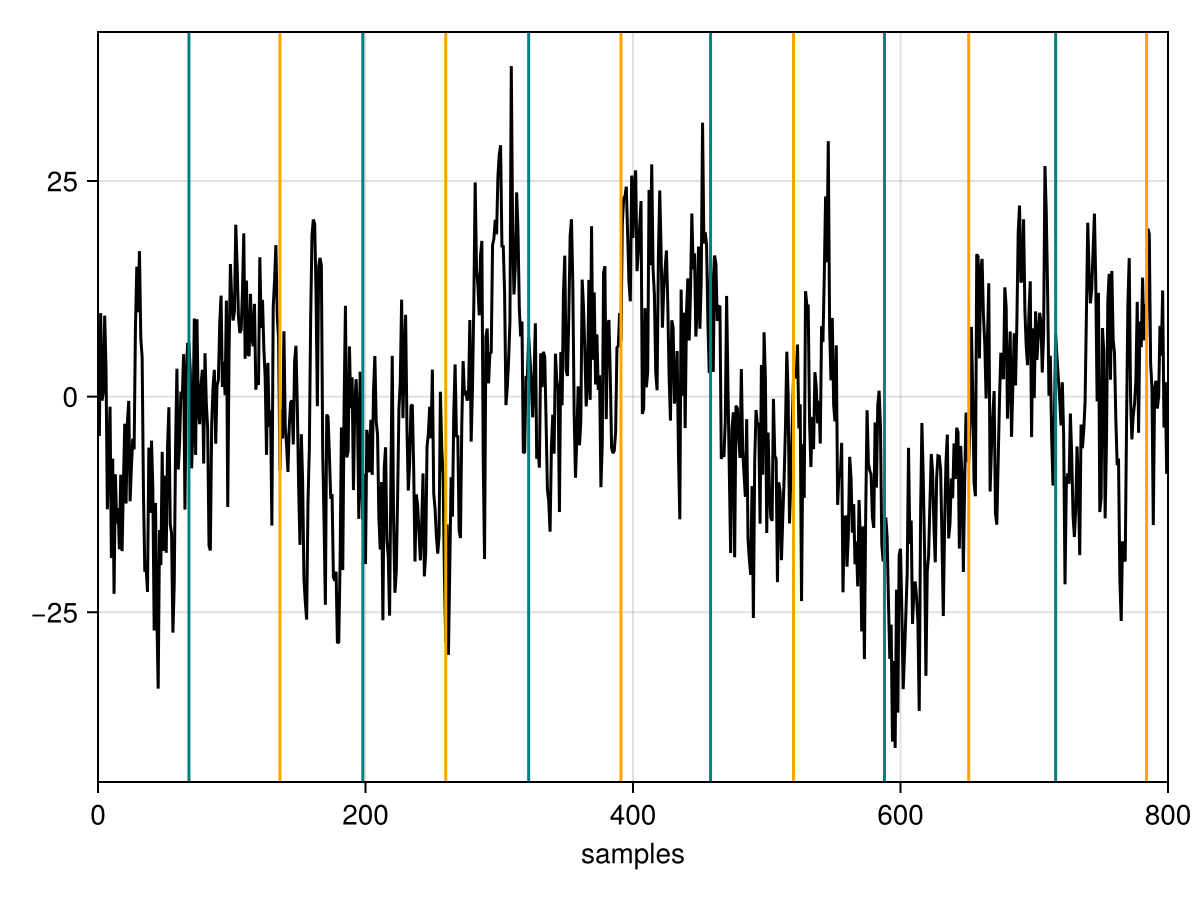

In [45]:
f = Figure()
ax = f[1,1] = Axis(f,xlabel="samples")
  n_samples = 800
lines!(ax,data[1:n_samples]; color = "black")
vlines!(ax,evts.latency;color=["orange","teal"][1 .+ (evts.condition .=="car")])
xlims!(ax, 0, n_samples)
f

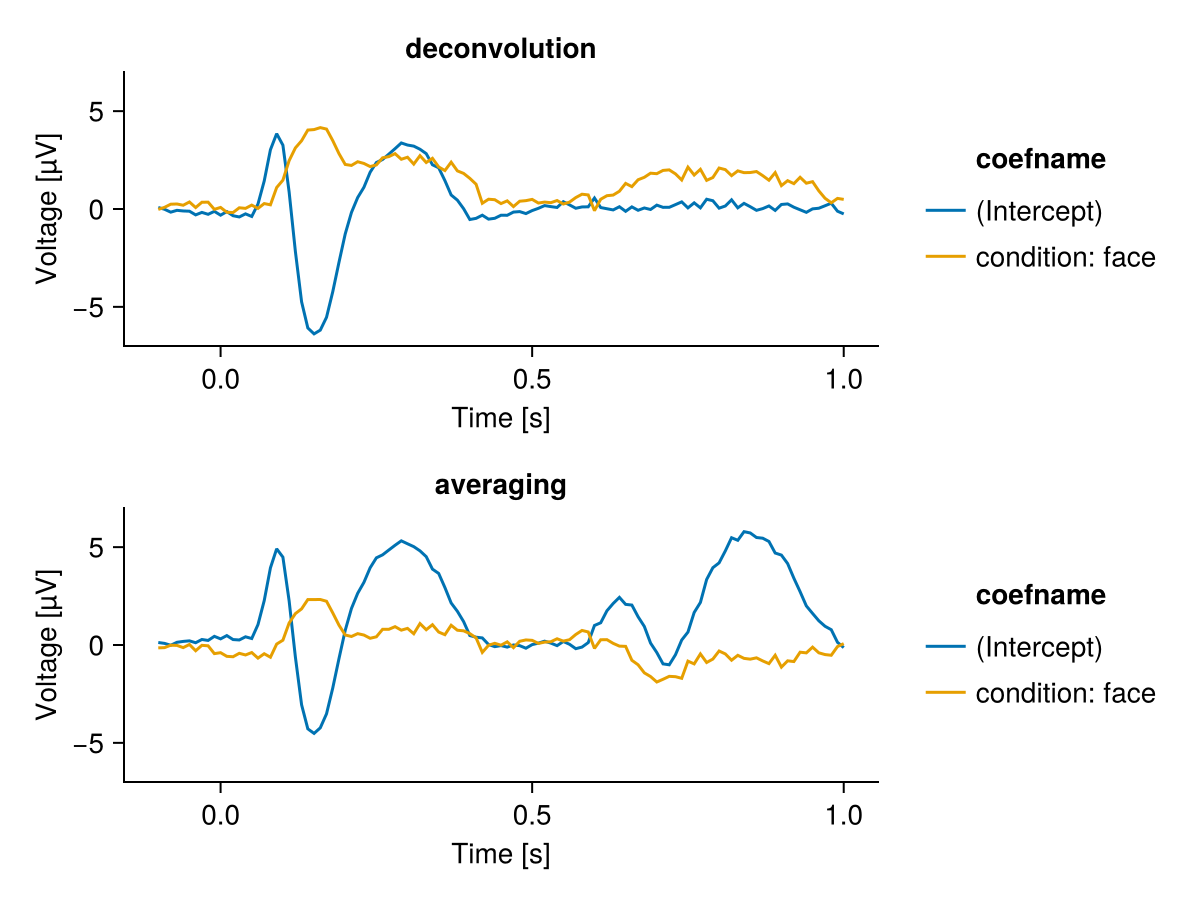

In [87]:
f = Figure()
plot_erp!(f[1,1],c)
ylims!(current_axis(),[-7,7])
current_axis().title = "deconvolution"

plot_erp!(f[2,1],c_epoch)
ylims!(current_axis(),[-7,7])
current_axis().title = "averaging"
current_figure()

In [85]:
sfreq = 100
jitter = 0.07
offset = 0.52
noiselevel = 5

5

In [86]:
data, evts = simulate(
    MersenneTwister(1), # random number generator
    design,
    [p1,n1,p3],
    UniformOnset(; width = jitter*sfreq, offset = offset*sfreq),
    PinkNoise(noiselevel=noiselevel),
);
m = fit(UnfoldModel,Dict( Any=>(@formula(0~1+condition), firbasis([-0.1,1],sfreq))),evts,data);
data_epoch,times = Unfold.epoch(data,evts,[-0.1,1],sfreq)
m_epoch = fit(UnfoldModel,Dict( Any=>(@formula(0~1+condition), times,sfreq)),evts,data_epoch);
	c_epoch = coeftable(m_epoch)
c = coeftable(m);

In [3]:
design =
    SingleSubjectDesign(;
        conditions = Dict(
            :condition => ["car", "face"],
        ),
    ) |> x -> RepeatDesign(x, 300);


In [44]:
dump(design)

RepeatDesign{SingleSubjectDesign}
  design: SingleSubjectDesign
    conditions: Dict{Symbol, Vector}
      slots: Array{UInt8}((16,)) UInt8[0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0xa4, 0x00, 0x00, 0x00, 0x00]
      keys: Array{Symbol}((16,))
        1: #undef
        2: #undef
        3: #undef
        4: #undef
        5: #undef
        ...
        12: Symbol condition
        13: #undef
        14: #undef
        15: #undef
        16: #undef
      vals: Array{Vector}((16,))
        1: #undef
        2: #undef
        3: #undef
        4: #undef
        5: #undef
        ...
        12: Array{String}((2,))
          1: String "car"
          2: String "face"
        13: #undef
        14: #undef
        15: #undef
        16: #undef
      ndel: Int64 0
      count: Int64 1
      age: UInt64 0x0000000000000001
      idxfloor: Int64 12
      maxprobe: Int64 0
    event_order_function: #10 (function of type UnfoldSim.var"#10#14")
  repeat: Int64 300


In [4]:
p1 = LinearModelComponent(; basis = p100(;sfreq), formula = @formula(0 ~ 1), β = [5]);
	
n1 = LinearModelComponent(;
    basis = n170(;sfreq), # basis is already negative
    formula = @formula(0 ~ 1 + condition),
    β = [5, -3],
);
p3 = LinearModelComponent(;
    basis = p300(;sfreq=sfreq), # trick to make the p300 last longer: sfreq*2
    formula = @formula(0 ~ 1 + condition),
    β = [5, 1],);